**Link de Download das bases**
https://drive.google.com/file/d/1DThLc9wV33nDv2nt8VLGwrwgyaEixCeS/view?usp=sharing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

In [2]:
def calcular_notificacoes_por_mes(arquivo_csv):
    df = pd.read_csv(arquivo_csv)

    df['dataNotificacao'] = pd.to_datetime(df['dataNotificacao'], errors='coerce')
    
    df = df.dropna(subset=['dataNotificacao'])

    df = df[df['dataNotificacao'].dt.year > 2021]

    df['ano_mes'] = df['dataNotificacao'].dt.to_period('M').astype(str)

    notificacoes_por_mes = df.groupby('ano_mes').size().reset_index(name='quantidade')

    print("Colunas no DataFrame final:", notificacoes_por_mes.columns)

    plt.figure(figsize=(12, 6))
    plt.plot(notificacoes_por_mes['ano_mes'], notificacoes_por_mes['quantidade'], marker='o', linestyle='-')
    plt.xticks(rotation=45)
    plt.xlabel("Ano-Mês")
    plt.ylabel("Número de Notificações")
    plt.title("Evolução do Número de Notificações por Mês")
    plt.grid()
    plt.show()

    return notificacoes_por_mes

**Notificações por Mês**

A função acima lê o arquivo CSV agrupa todas as notificações após de 2021 por mês e plota essas notificações em um gráfico. Após isso essa coleção de notificações por mês é retornada para ser utilizada no modelo de previsão

C:\Users\pcdat\AppData\Local\Temp\ipykernel_20744\1736268374.py:2: DtypeWarning: Columns (12,16,21,23,26,31,33,34,37,58,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo_csv)


Colunas no DataFrame final: Index(['ano_mes', 'quantidade'], dtype='object')


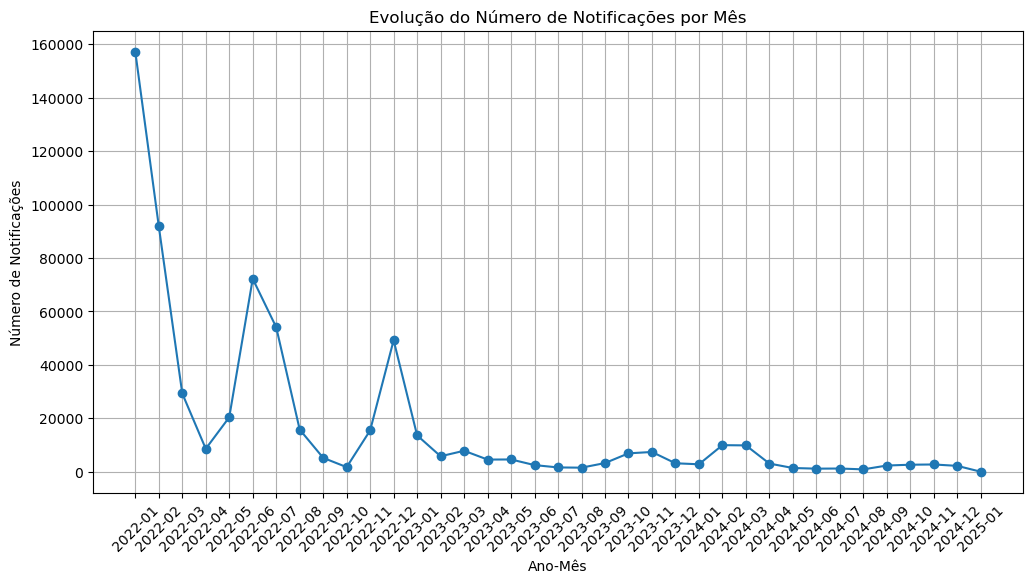

In [4]:
notificacoes_por_mes = calcular_notificacoes_por_mes('dados_balanceados.csv')

In [5]:
def prever_proximo_mes(notificacoes_por_mes):
    notificacoes_por_mes['ano_mes'] = pd.to_datetime(notificacoes_por_mes['ano_mes'].astype(str))
    notificacoes_por_mes['timestamp'] = (notificacoes_por_mes['ano_mes'] - notificacoes_por_mes['ano_mes'].min()).dt.days
    
    X = notificacoes_por_mes[['timestamp']]
    y = notificacoes_por_mes['quantidade']
    
    # Criando um modelo de regressão polinomial de grau 2
    modelo = make_pipeline(PolynomialFeatures(2), LinearRegression())
    modelo.fit(X, y)
    
    proximo_mes = np.array([[notificacoes_por_mes['timestamp'].max() + 30]])
    previsao = modelo.predict(proximo_mes)
    
    # Não permitir que a previsão seja negativa
    previsao = max(0, previsao[0])
    
    print("Previsão para o próximo mês:", previsao)
    return previsao


**Previsão de Notificações**

A previsão de notificações se encaixa em uma tarefa de previsão de séries temporais. Para esse tipo de tarefa existem diversos modelos, na seguinte implementação utilizamos o modelo de regressão linear que é serve para prever tendências lineares. Como nesse caso a relação de notificações com o tempo não é linear, pois como podemos visualizar no gráfico acima existem pontos de inflexão, utilizamos um modelo de regressão polinomial de polinômio de grau 2 (Configurado na chamada PolynomialFeatures(2))

In [7]:
prever_proximo_mes(notificacoes_por_mes)

Previsão para o próximo mês: 17052.198222027422


C:\Users\pcdat\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


17052.198222027422